# LV05 Filters

## Moving Average FIR Lowpass
$y(n) = ax(n)+(1-a)x(n-1)$


$a$ is a coefficient that can be chosen.


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
def simpleFir(x, a):
    x1 = 0
    Y = np.zeros_like(x)
    for i,xi in enumerate(x):
        try:
            x1 = x[i-1]
        except:
            pass
        y = x1*a+xi*(1-a)
        Y[i]=y
    return Y

In [19]:
x = sig.unit_impulse(30, idx=10)

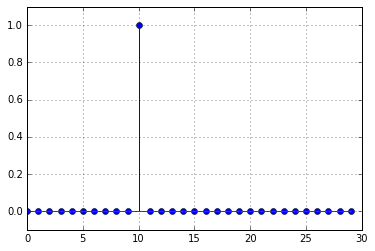

In [20]:
plt.stem(x)
plt.ylim([-0.1,1.1])
plt.grid()
plt.show()

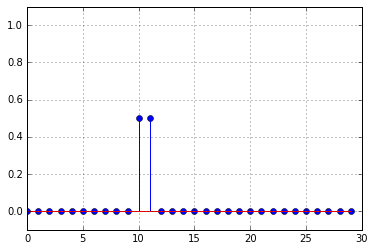

In [21]:
y = simpleFir(x, 0.5)
plt.stem(y)
plt.ylim([-0.1,1.1])
plt.grid()
plt.show()


In [22]:
s = np.fft.fft(y)
mag = abs(s)
ph = np.angle(s)

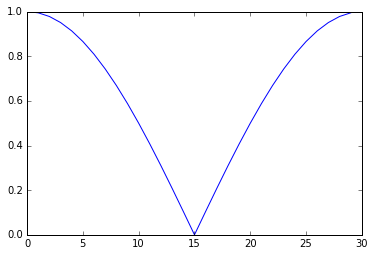

In [23]:
plt.plot(mag)
plt.show()

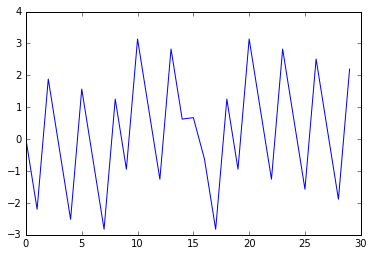

In [24]:
plt.plot(ph)
plt.show()

### Analysis
Difference Equation:
$y(n) = ax(n)+(1-a)x(n-1)$

Going to the Transfer function:

$Y = a\cdot X + (1-a) \cdot X \cdot z^{-1}$

$Y = X \cdot (a + (1-a) \cdot z^{-1})$

$\frac{Y}{X} = a + (1-a) \cdot z^{-1}$

Arriving at the Transfer function:

$H(z) = a + (1-a) \cdot z^{-1}$


To plot the spectral magnitude, we just need to set $z = e^{i\omega}$ where $\omega$ goes from 0 to $\pi$ and get the absolute Value. 


In [46]:
def getMagOfFir(omega,a):
    z = np.e**(omega*1j)
    return np.abs(a+(1-a)*z**-1)

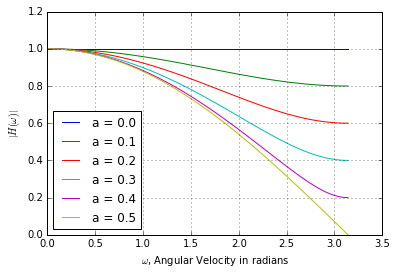

In [57]:
freqRange = np.linspace(0, np.pi, 100)

ass = np.linspace(0.0,0.5,6)
for a in ass:
    plt.plot(freqRange,getMagOfFir(freqRange,a), label='a = '+str(a))
plt.legend(loc='best')
plt.xlabel('$\omega$, Angular Velocity in radians')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.show()


## Simple IIR
$y(n) = x(n)\cdot b_0 +y(n-1) \cdot a_1$

In [61]:
def simpleIIR(x,b0,a1):
    yi=0
    Y =np.zeros_like(x)
    for i,xi in enumerate(x):
        yi = xi*b0+yi*a1
        Y[i]=yi
    return Y
        

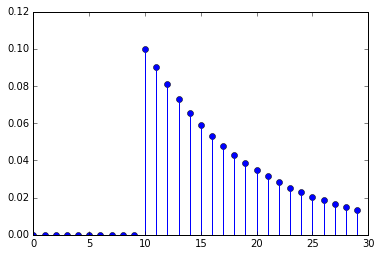

In [62]:
y = simpleIIR(x, 0.1,0.9)
plt.stem(y)
plt.show()

### Analysis
Transfer function (calculate it yourself!):

$H(z) = \frac{b_0}{1-a_1z^{-1}}$

In [66]:
def getMagOfIir(omega,b0,a1):
    z = np.e**(omega*1j)
    return np.abs (b0/(1-a1*z**-1))


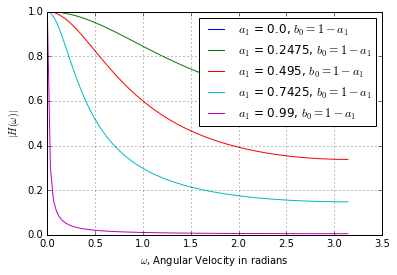

In [73]:
freqRange = np.linspace(0, np.pi, 100)

ass = np.linspace(0.0,0.99,5)
for a1 in ass:
    b0 = 1-a1
    plt.plot(freqRange,getMagOfIir(freqRange,b0,a1), label='$a_1$ = '+str(a1)+', $b_0=1-a_1$' )
plt.legend(loc='best')
plt.xlabel('$\omega$, Angular Velocity in radians')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.show()


## Filter Design 
What are the differences between Filters?
- IIR / FIR
- Filter Topology/Implementation
- Discretization method
- Coefficient Calculation

Differenes between IIR and FIR should be more or less clear now.

Differences between Filter Topologies (such as direct Form I,direct Form II, Lattice) are ignored here. The differences are in numerical stability, Memory and CPU consumption etc.

Discretation Methods means how to we get from an analog continuous Transfer function to a discrete one and therefore to a digital Filter. Yuo can have a look here for different ways to do this. The most common one, but not the optimal one on all cases is the *bilinear transform*. https://en.wikibooks.org/wiki/Control_Systems/Z_Transform_Mappings

The issue of coeficient claculation is nearly the most important for us, Chebyshev I, Chebyshev II and Butterworth are such coefficient calulation techniques. 

Further comparisons: http://www.etc.tuiasi.ro/cin/Downloads/Filters/Filters.htm


![filter CHoice](img/HCF.gif)



In [103]:
filterOrder = 5
Wn = 0.5 #'Cutoff', normailzed frequency (half-cycles/sample)

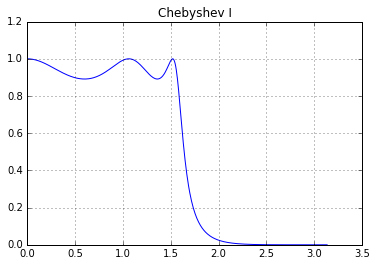

In [98]:
cheb1Ba = sig.cheby1(filterOrder,1,Wn)
w,h = sig.freqz(cheb1Ba[0],a=cheb1Ba[1])
plt.plot(w,np.abs(h))
plt.title('Chebyshev I')
plt.grid()
plt.show()

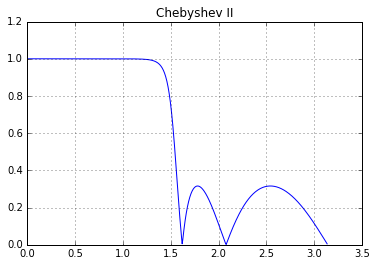

In [99]:
cheb1Ba = sig.cheby2(filterOrder,10,Wn)
w,h = sig.freqz(cheb1Ba[0],a=cheb1Ba[1])
plt.plot(w,np.abs(h))
plt.title('Chebyshev II')
plt.grid()
plt.show()

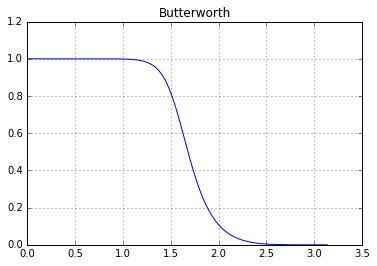

In [100]:
butterBa = sig.butter(filterOrder,Wn)
w,h = sig.freqz(butterBa[0],a=butterBa[1])
plt.plot(w,np.abs(h))
plt.title('Butterworth')
plt.grid()
plt.show()

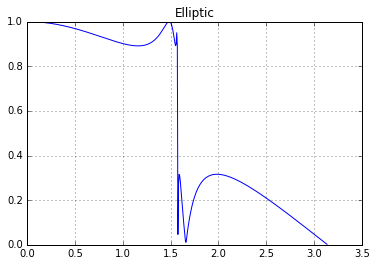

In [101]:
ellipBa = sig.ellip(filterOrder,1,10,0.5)
w,h = sig.freqz(ellipBa[0],a=ellipBa[1])
plt.plot(w,np.abs(h))
plt.title('Elliptic')
plt.grid()
plt.show()

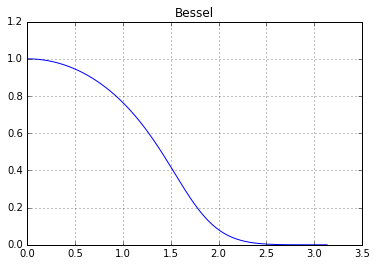

In [102]:
bessBa = sig.bessel(filterOrder,Wn)
w,h = sig.freqz(bessBa[0],a=bessBa[1])
plt.plot(w,np.abs(h))
plt.title('Bessel')
plt.grid()
plt.show()